In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
gold_df=pd.read_csv('Gold_data.csv')
#gold_df.index.period='D' # frequency is Calender Day
gold_df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [3]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


<AxesSubplot:>

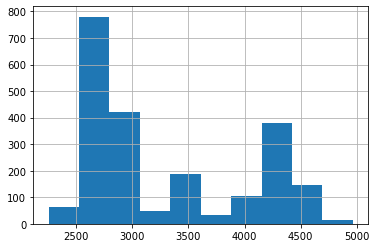

In [4]:
gold_df['price'].hist()

In [5]:
gold_df['price'].describe()

count    2182.000000
mean     3284.450046
std       719.564434
min      2252.600000
25%      2697.020000
50%      2879.800000
75%      4147.325000
max      4966.300000
Name: price, dtype: float64

<AxesSubplot:>

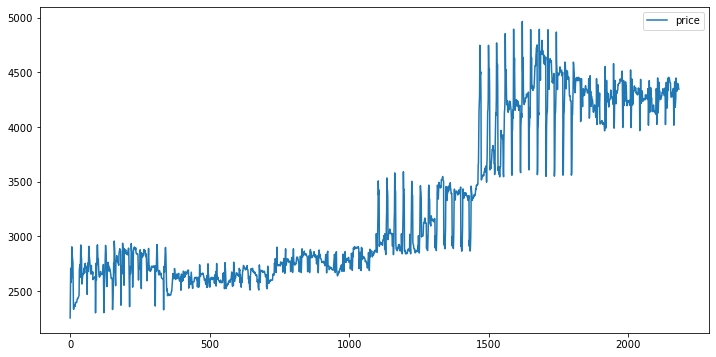

In [6]:
gold_df.plot(figsize=(12,6))

In [7]:
t=range (1, 2183)
gold_df['t']=t

In [8]:
gold_df['t_square']=gold_df['t']**2 

In [9]:
gold_df['natural_log'] = np.log(gold_df['price'])

In [10]:
gold_df

,date,price,t,t_square,natural_log
0,2016-01-01,2252.60,1,1,7.719840
1,2016-01-02,2454.50,2,4,7.805678
2,2016-01-03,2708.10,3,9,7.904003
3,2016-01-04,2577.80,4,16,7.854692
4,2016-01-05,2597.75,5,25,7.862401
...,...,...,...,...,...
2177,2021-12-17,4394.40,2178,4743684,8.388086
2178,2021-12-18,4389.50,2179,4748041,8.386971
2179,2021-12-19,4389.50,2180,4752400,8.386971
2180,2021-12-20,4354.10,2181,4756761,8.378873


# Moving Average 

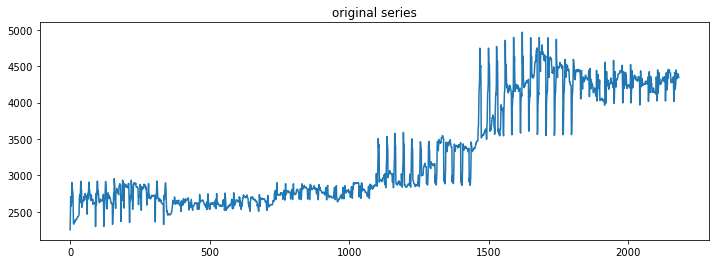

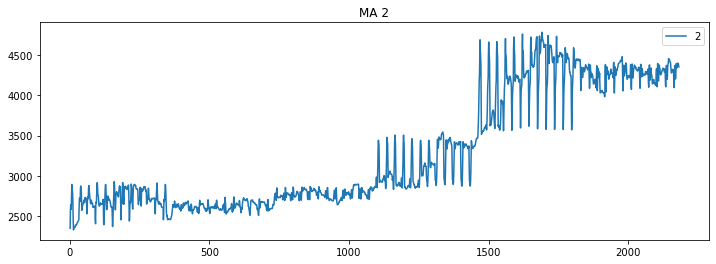

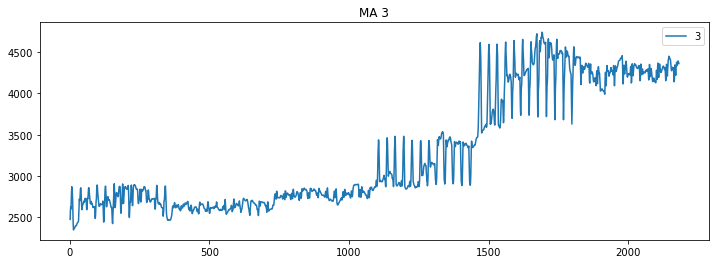

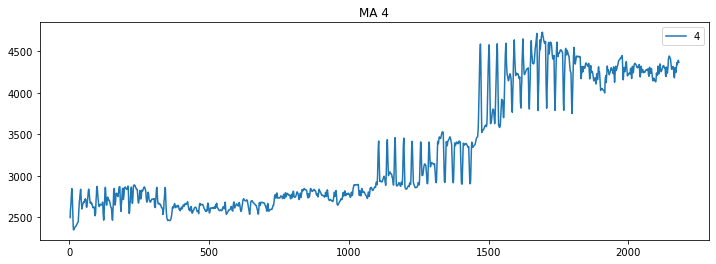

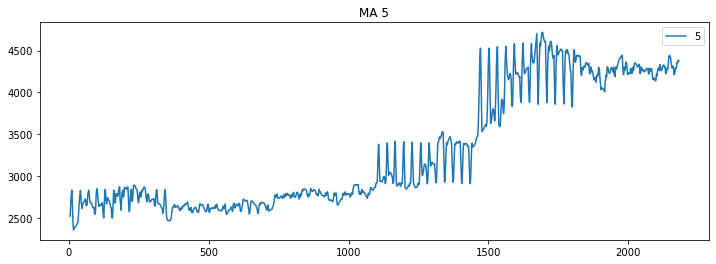

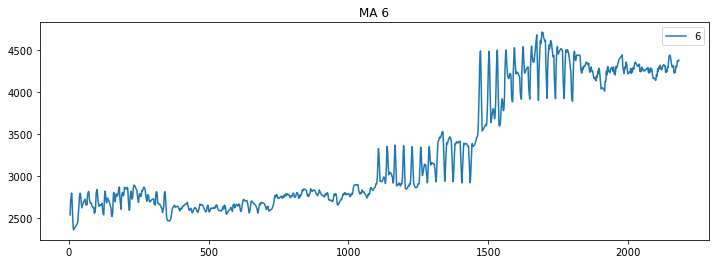

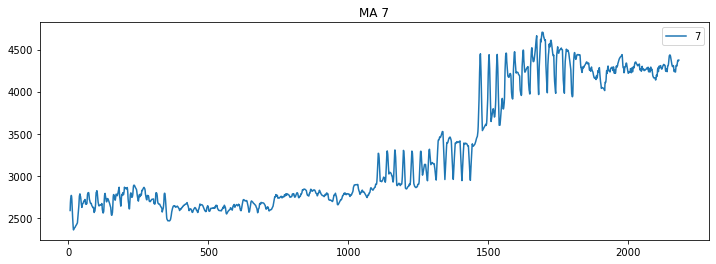

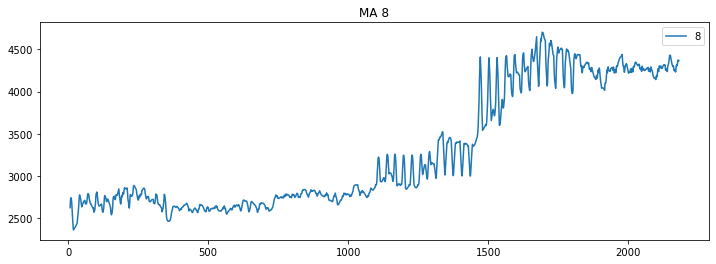

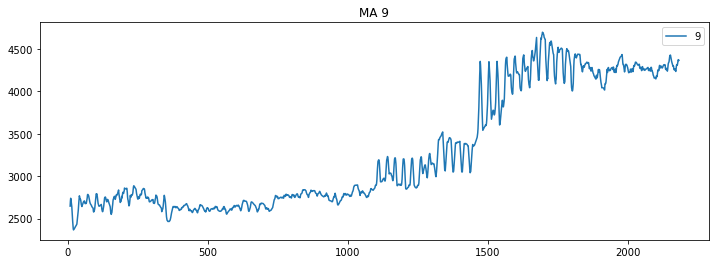

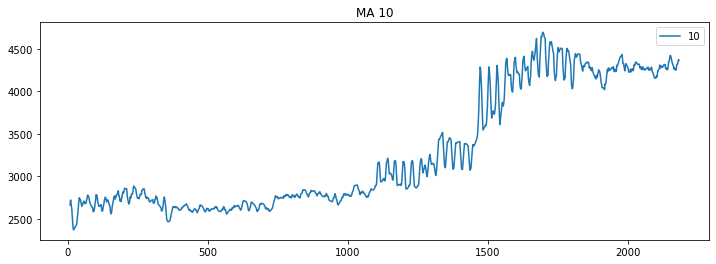

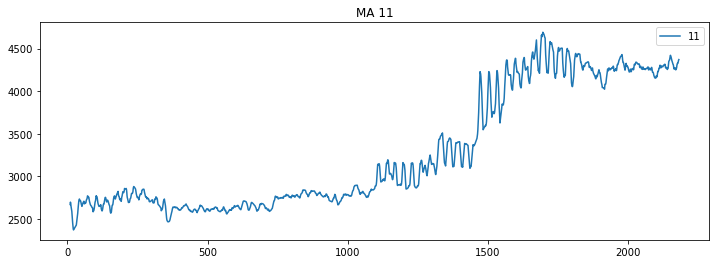

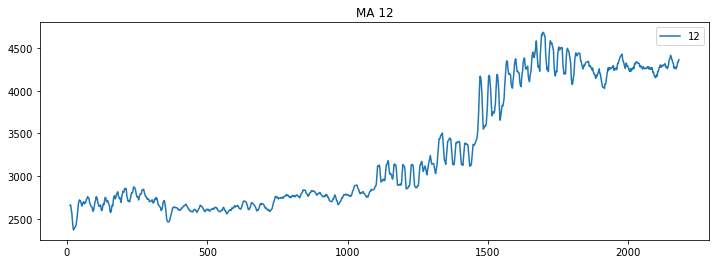

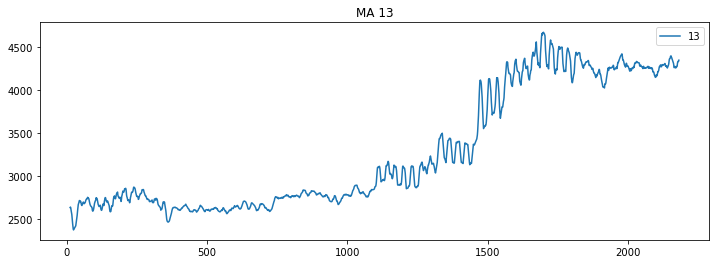

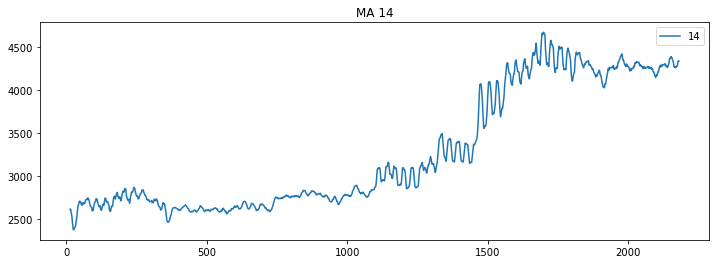

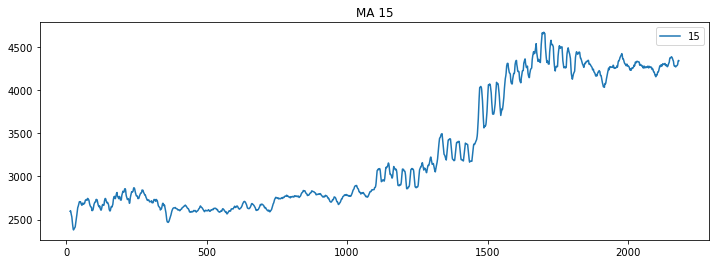

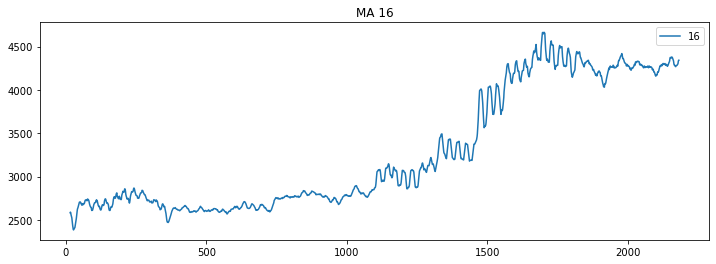

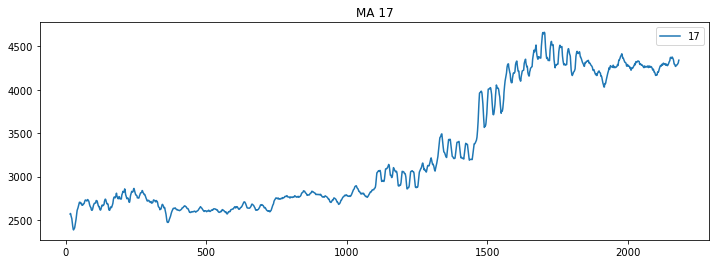

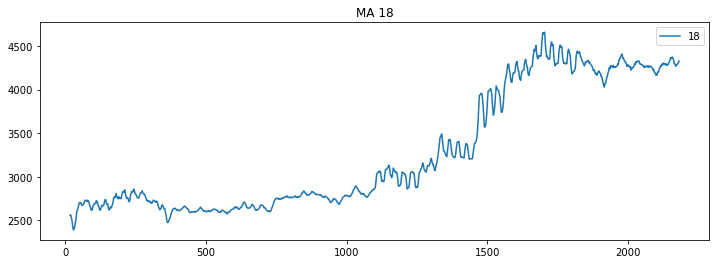

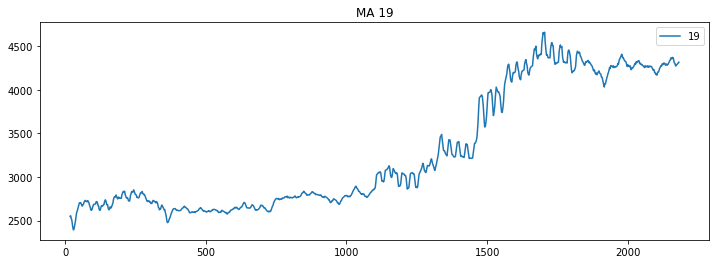

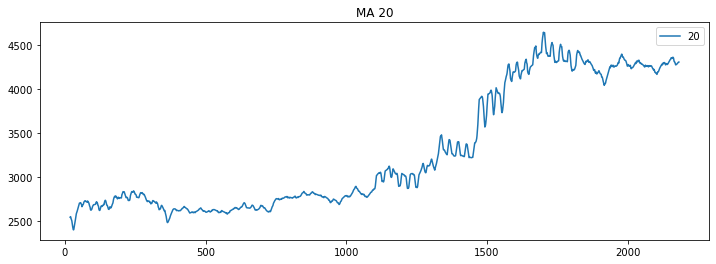

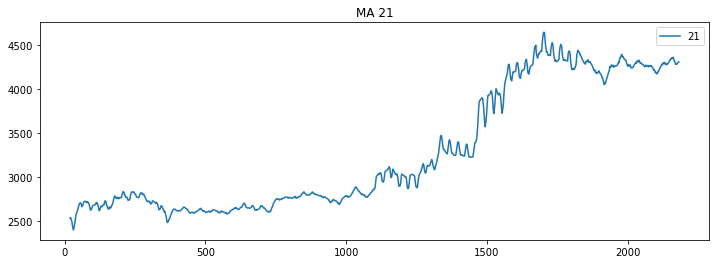

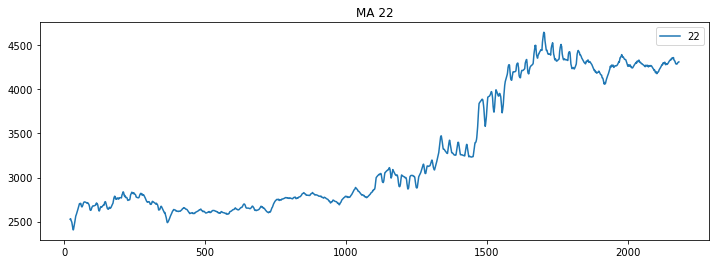

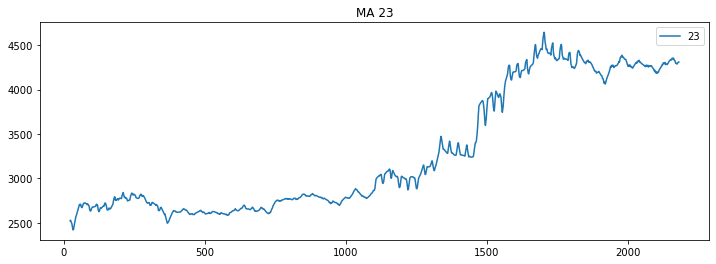

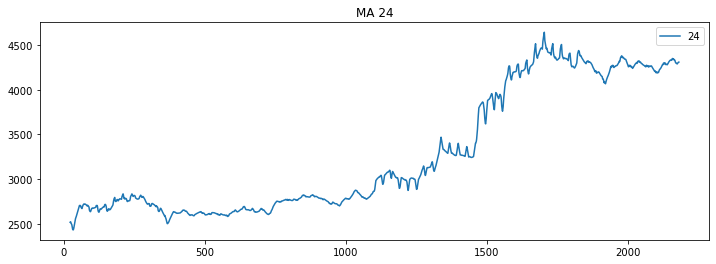

In [11]:
plt.figure(figsize=(12,4))
gold_df.price.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    gold_df["price"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot 

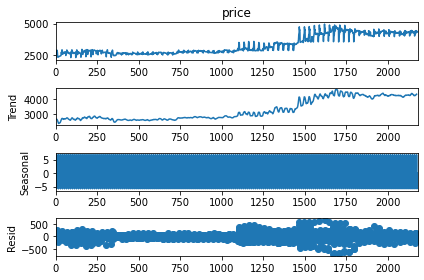

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(gold_df.price,period=12)
decompose_ts_add.plot()
plt.show()

## Line Plot

<AxesSubplot:xlabel='date', ylabel='price'>

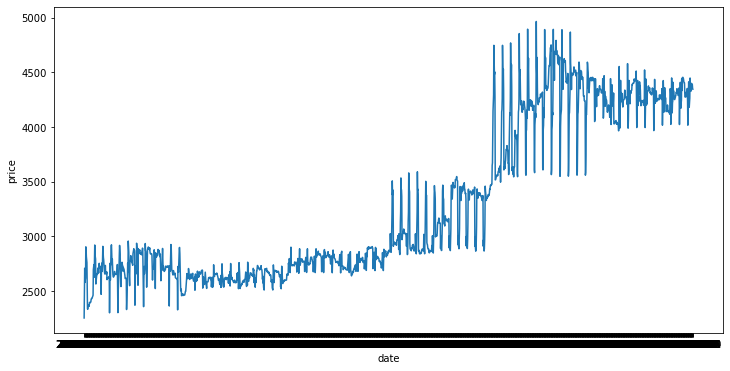

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x="date",y="price",data=gold_df) 

## Train Test Split

In [14]:
train_data=gold_df.iloc[:2152]
test_data=gold_df.iloc[2152:]

<AxesSubplot:>

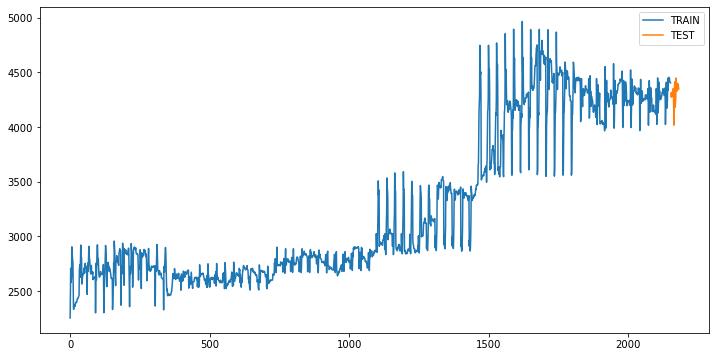

In [15]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(12,6))

## Fitting the model

In [16]:
model=ExponentialSmoothing(train_data['price'],trend='mul',seasonal_periods=30)
fitted_model=model.fit()

## Evaluating Model against Test set

In [17]:
test_predictions=fitted_model.forecast(30)

In [18]:
test_predictions

2152    4407.767004
2153    4411.318444
2154    4414.872745
2155    4418.429910
2156    4421.989941
2157    4425.552840
2158    4429.118610
2159    4432.687253
2160    4436.258772
2161    4439.833168
2162    4443.410444
2163    4446.990602
2164    4450.573645
2165    4454.159575
2166    4457.748394
2167    4461.340105
2168    4464.934709
2169    4468.532210
2170    4472.132610
2171    4475.735910
2172    4479.342114
2173    4482.951223
2174    4486.563241
2175    4490.178168
2176    4493.796008
2177    4497.416763
2178    4501.040436
2179    4504.667028
2180    4508.296542
2181    4511.928981
dtype: float64

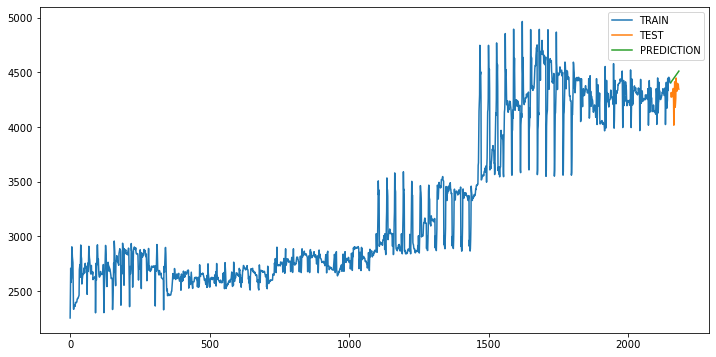

In [19]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions.plot(legend=True, label='PREDICTION');

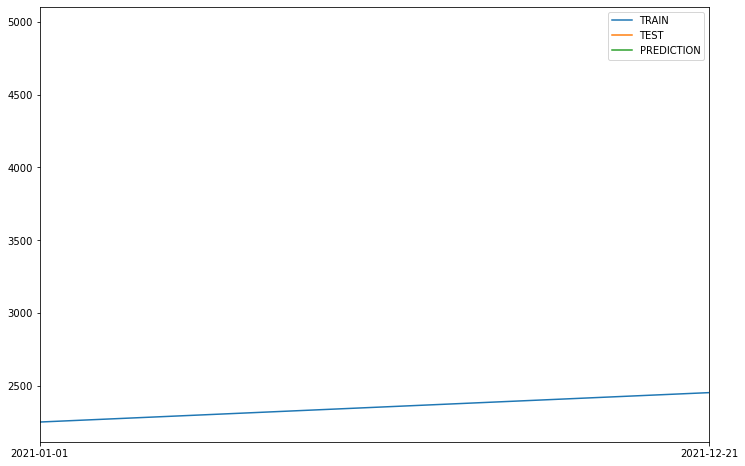

In [20]:
train_data['price'].plot(legend=True,label='TRAIN')
test_data['price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True, label='PREDICTION',xlim=['2021-01-01','2021-12-21']);

## Simple Exponential Smoothing

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alpha=0.15

In [22]:
model_SES=SimpleExpSmoothing(gold_df['price'])
fitted_model_SES=model_SES.fit(smoothing_level=alpha,optimized=False)
gold_df['SES']=fitted_model_SES.fittedvalues.shift(-1)

In [23]:
gold_df.head()

,date,price,t,t_square,natural_log,SES
0,2016-01-01,2252.60,1,1,7.719840,2252.600000
1,2016-01-02,2454.50,2,4,7.805678,2282.885000
2,2016-01-03,2708.10,3,9,7.904003,2346.667250
3,2016-01-04,2577.80,4,16,7.854692,2381.337162
4,2016-01-05,2597.75,5,25,7.862401,2413.799088


## Double Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [25]:
mod_add=ExponentialSmoothing(gold_df['price'],trend='add')
fitted_mod_add=mod_add.fit()
gold_df['DESadd']=fitted_mod_add.fittedvalues.shift(-1)
gold_df.head()

,date,price,t,t_square,natural_log,SES,DESadd
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979


In [26]:

Train = gold_df.head(2152)
Test = gold_df.tail(30)


In [27]:
# Holt method applied as is on the original data
from sklearn.metrics import mean_squared_error
import math
hw_model = Holt(Train["price"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MSEH = mean_squared_error(Test.price,pred_hw)
 
RMSEH = math.sqrt(MSEH)  
print(RMSEH)

125.70131694535374


<AxesSubplot:>

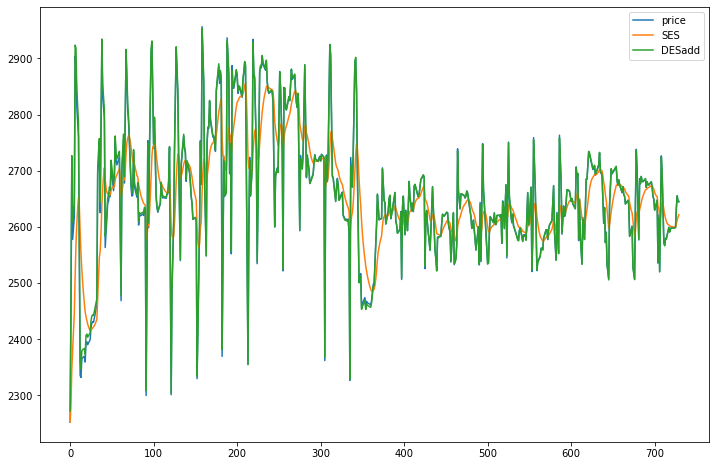

In [28]:
gold_df[['price','SES','DESadd',]].iloc[:730].plot(figsize=(12,8))

In [29]:
mod_mul=ExponentialSmoothing(gold_df['price'],trend='mul')
fitted_mod_mul=mod_mul.fit()
gold_df['DESmul']=fitted_mod_mul.fittedvalues.shift(-1)
gold_df.head()

,date,price,t,t_square,natural_log,SES,DESadd,DESmul
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484,2272.328586
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652,2471.422350
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854,2734.740022
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734,2619.739403
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979,2631.206054


<AxesSubplot:>

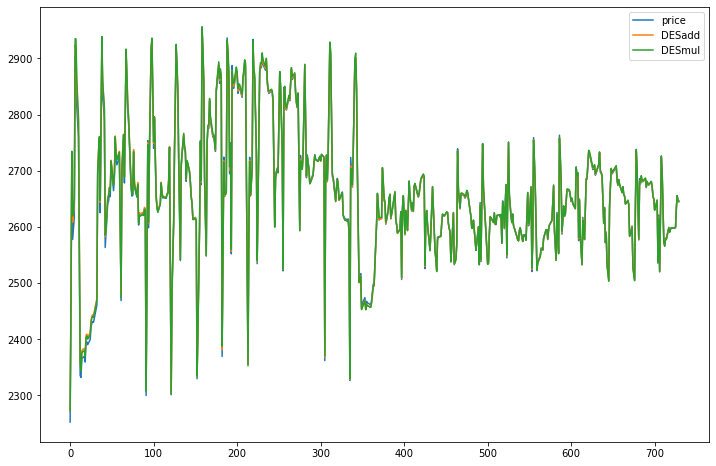

In [30]:
gold_df[['price','DESadd','DESmul']].iloc[:730].plot(figsize=(12,8))

## Triple Exponential Smoothing

In [31]:
# Triple Exponential with additive trend and additive seasonality
gold_df['TESadd']=ExponentialSmoothing(gold_df['price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
gold_df.head()

,date,price,t,t_square,natural_log,SES,DESadd,DESmul,TESadd
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484,2272.328586,2352.169699
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652,2471.422350,2536.034465
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854,2734.740022,2640.878558
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734,2619.739403,2590.764634
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979,2631.206054,2563.111039


In [32]:
# Triple Exponential with Multiplicative trend and Multiplicative seasonality
gold_df['TESmul']=ExponentialSmoothing(gold_df['price'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
gold_df.head()

,date,price,t,t_square,natural_log,SES,DESadd,DESmul,TESadd,TESmul
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484,2272.328586,2352.169699,2425.971121
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652,2471.422350,2536.034465,2675.865609
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854,2734.740022,2640.878558,2547.621776
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734,2619.739403,2590.764634,2568.145398
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979,2631.206054,2563.111039,2588.738485


In [33]:
# Triple Exponential with Multiplicative trend and additive seasonality
gold_df['TESmuladd']=ExponentialSmoothing(gold_df['price'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
gold_df.head()

,date,price,t,t_square,natural_log,SES,DESadd,DESmul,TESadd,TESmul,TESmuladd
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484,2272.328586,2352.169699,2425.971121,2424.158513
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652,2471.422350,2536.034465,2675.865609,2677.022871
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854,2734.740022,2640.878558,2547.621776,2547.233049
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734,2619.739403,2590.764634,2568.145398,2567.994153
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979,2631.206054,2563.111039,2588.738485,2588.812665


In [34]:
# Triple Exponential with Multiplicative trend and additive seasonality
gold_df['TESaddmul']=ExponentialSmoothing(gold_df['price'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
gold_df.head()

C:\Users\ajith\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,date,price,t,t_square,natural_log,SES,DESadd,DESmul,TESadd,TESmul,TESmuladd,TESaddmul
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484,2272.328586,2352.169699,2425.971121,2424.158513,2434.663439
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652,2471.422350,2536.034465,2675.865609,2677.022871,2685.973024
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854,2734.740022,2640.878558,2547.621776,2547.233049,2556.714065
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734,2619.739403,2590.764634,2568.145398,2567.994153,2576.500125
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979,2631.206054,2563.111039,2588.738485,2588.812665,2596.288751


<AxesSubplot:>

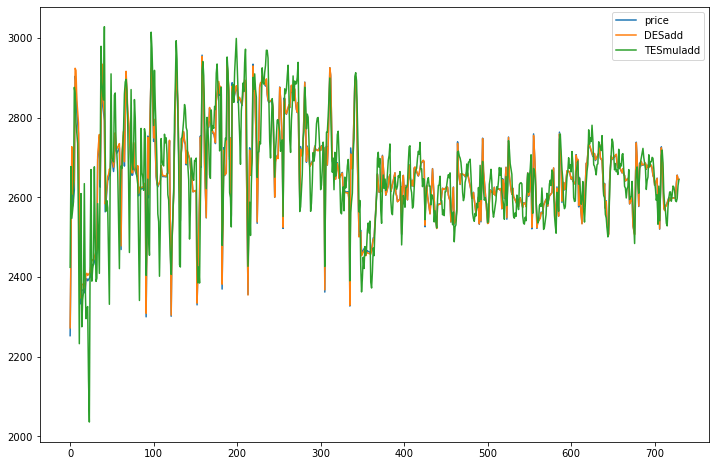

In [35]:
gold_df[['price','DESadd','TESmuladd']].iloc[:730].plot(figsize=(12,8))

In [36]:
from datetime import datetime as dt
gold_df["Date"] = pd.to_datetime(gold_df.date)
gold_df.info()
#coca_d["month"] = coca_df.Date.dt.strftime("%b") # month extraction
#coca_df["year"] = coca_df.Date.dt.strftime("%Y") # year extraction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2182 non-null   object        
 1   price        2182 non-null   float64       
 2   t            2182 non-null   int64         
 3   t_square     2182 non-null   int64         
 4   natural_log  2182 non-null   float64       
 5   SES          2181 non-null   float64       
 6   DESadd       2181 non-null   float64       
 7   DESmul       2181 non-null   float64       
 8   TESadd       2181 non-null   float64       
 9   TESmul       2181 non-null   float64       
 10  TESmuladd    2181 non-null   float64       
 11  TESaddmul    2181 non-null   float64       
 12  Date         2182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 221.7+ KB


In [37]:
gold_df.head()

,date,price,t,t_square,natural_log,SES,DESadd,DESmul,TESadd,TESmul,TESmuladd,TESaddmul,Date
0,2016-01-01,2252.60,1,1,7.719840,2252.600000,2272.182484,2272.328586,2352.169699,2425.971121,2424.158513,2434.663439,2016-01-01
1,2016-01-02,2454.50,2,4,7.805678,2282.885000,2470.366652,2471.422350,2536.034465,2675.865609,2677.022871,2685.973024,2016-01-02
2,2016-01-03,2708.10,3,9,7.904003,2346.667250,2726.888854,2734.740022,2640.878558,2547.621776,2547.233049,2556.714065,2016-01-03
3,2016-01-04,2577.80,4,16,7.854692,2381.337162,2608.315734,2619.739403,2590.764634,2568.145398,2567.994153,2576.500125,2016-01-04
4,2016-01-05,2597.75,5,25,7.862401,2413.799088,2622.705979,2631.206054,2563.111039,2588.738485,2588.812665,2596.288751,2016-01-05


## Log Transformation

In [38]:
series = pd.read_csv('Gold_data.csv', header=0, index_col=0, parse_dates=True,squeeze=True) 
series

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

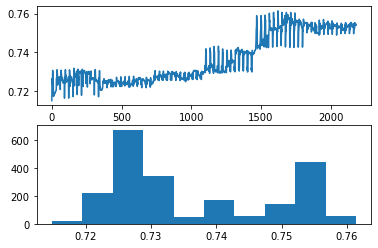

In [83]:
from numpy import log
from matplotlib import pyplot 
from pandas import DataFrame

dataframe = DataFrame(series.values)
dataframe.columns = ['price']
dataframe['price'] = log(dataframe['price'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['price'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['price'])
pyplot.show() 

<AxesSubplot:>

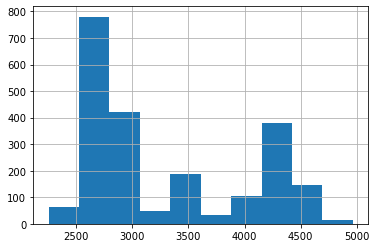

In [40]:
gold_df['price'].hist()

## Square Root Transformation

In [41]:
from numpy import sqrt
dataframe_sq=pd.read_csv('Gold_data.csv')
#dataframe_sq = DataFrame(series.values)
#dataframe_sq.columns = ['price_sq']
dataframe_sq['price_sq'] = sqrt(gold_df['price'])

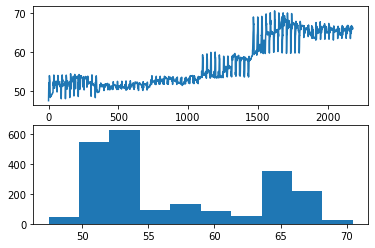

In [42]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe_sq['price_sq'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe_sq['price_sq'])
pyplot.show() 

In [43]:
t=range (1, 2183)
dataframe_sq['t']=t


dataframe_sq['t_square']=dataframe_sq['t']**2 

dataframe_sq['natural_log'] = np.log(dataframe_sq['price_sq'])
dataframe_sq

,date,price,price_sq,t,t_square,natural_log
0,2016-01-01,2252.60,47.461563,1,1,3.859920
1,2016-01-02,2454.50,49.542911,2,4,3.902839
2,2016-01-03,2708.10,52.039408,3,9,3.952001
3,2016-01-04,2577.80,50.772040,4,16,3.927346
4,2016-01-05,2597.75,50.968127,5,25,3.931200
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,66.290271,2178,4743684,4.194043
2178,2021-12-18,4389.50,66.253302,2179,4748041,4.193485
2179,2021-12-19,4389.50,66.253302,2180,4752400,4.193485
2180,2021-12-20,4354.10,65.985604,2181,4756761,4.189437


In [44]:
"""""
#Linear Model
import statsmodels.formula.api as smf 
Train = dataframe_sq.head(2152)
Test = dataframe_sq.tail(30)

linear_model = smf.ols('price_sq~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price_sq'])-np.array(pred_linear))**2)) 
rmse_linear

"""""

'""\n#Linear Model\nimport statsmodels.formula.api as smf \nTrain = dataframe_sq.head(2152)\nTest = dataframe_sq.tail(30)\n\nlinear_model = smf.ols(\'price_sq~t\',data=Train).fit()\npred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test[\'t\'])))\nrmse_linear = np.sqrt(np.mean((np.array(Test[\'price_sq\'])-np.array(pred_linear))**2)) \nrmse_linear\n\n'

In [45]:
#Exponential

import statsmodels.formula.api as smf 
Train = dataframe_sq.head(2152)
Test = dataframe_sq.tail(30)
Exp = smf.ols('price_sq~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price_sq'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 


6.310814892766808e+28

In [46]:
#Quadratic 

Quad = smf.ols('price_sq~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price_sq'])-np.array(pred_Quad))**2))
rmse_Quad 

4.497701693357781

In [47]:
# Holt method 
from sklearn.metrics import mean_squared_error
import math
hw_model = Holt(Train["price_sq"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MSE2 = mean_squared_error(Test.price_sq,pred_hw)
 
RMSE2 = math.sqrt(MSE2)  
print(RMSE2)

0.963232853879723


In [48]:
### Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["price_sq"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MSE3 = mean_squared_error(Test.price_sq,pred_hwe_add_add) 
RMSE3 = math.sqrt(MSE3)  
print(RMSE3)

1.0171198304131108


In [49]:
dataframe_sq

,date,price,price_sq,t,t_square,natural_log
0,2016-01-01,2252.60,47.461563,1,1,3.859920
1,2016-01-02,2454.50,49.542911,2,4,3.902839
2,2016-01-03,2708.10,52.039408,3,9,3.952001
3,2016-01-04,2577.80,50.772040,4,16,3.927346
4,2016-01-05,2597.75,50.968127,5,25,3.931200
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,66.290271,2178,4743684,4.194043
2178,2021-12-18,4389.50,66.253302,2179,4748041,4.193485
2179,2021-12-19,4389.50,66.253302,2180,4752400,4.193485
2180,2021-12-20,4354.10,65.985604,2181,4756761,4.189437


In [50]:
# Double Exponential with additive trend and additive seasonality after applying square root transformation
mod_add=ExponentialSmoothing(dataframe_sq['price_sq'],trend='add')
fitted_mod_add=mod_add.fit()
dataframe_sq['DESadd']=fitted_mod_add.fittedvalues.shift(-1)
dataframe_sq.head()

,date,price,price_sq,t,t_square,natural_log,DESadd
0,2016-01-01,2252.60,47.461563,1,1,3.859920,47.470203
1,2016-01-02,2454.50,49.542911,2,4,3.902839,49.532221
2,2016-01-03,2708.10,52.039408,3,9,3.952001,52.024704
3,2016-01-04,2577.80,50.772040,4,16,3.927346,50.792075
4,2016-01-05,2597.75,50.968127,5,25,3.931200,50.974962


In [51]:
# Triple Exponential with additive trend and additive seasonality after applying square root transformation
dataframe_sq['TESadd']=ExponentialSmoothing(dataframe_sq['price_sq'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
dataframe_sq.head()

,date,price,price_sq,t,t_square,natural_log,DESadd,TESadd
0,2016-01-01,2252.60,47.461563,1,1,3.859920,47.470203,47.404701
1,2016-01-02,2454.50,49.542911,2,4,3.902839,49.532221,49.589497
2,2016-01-03,2708.10,52.039408,3,9,3.952001,52.024704,52.043756
3,2016-01-04,2577.80,50.772040,4,16,3.927346,50.792075,50.759300
4,2016-01-05,2597.75,50.968127,5,25,3.931200,50.974962,50.898104


<AxesSubplot:>

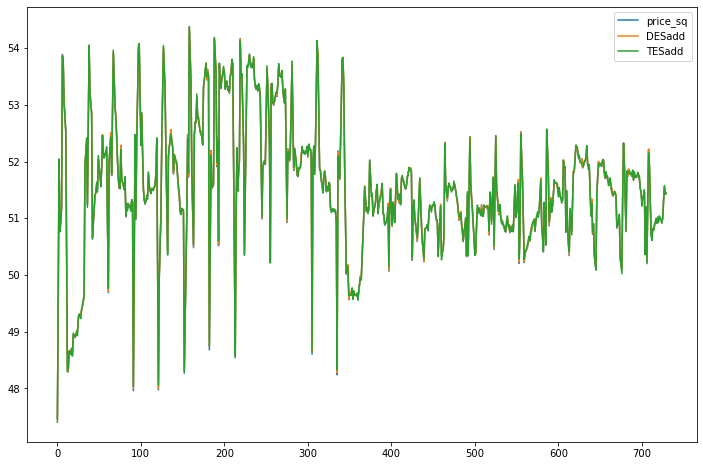

In [52]:
dataframe_sq[['price_sq','DESadd','TESadd']].iloc[:730].plot(figsize=(12,8))

<AxesSubplot:>

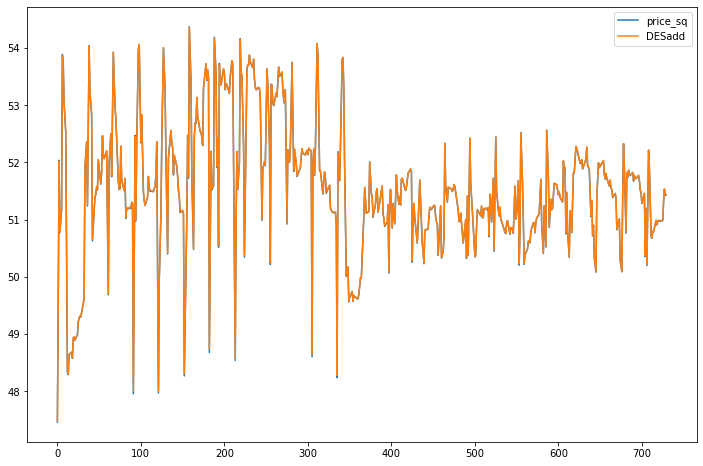

In [53]:
dataframe_sq[['price_sq','DESadd']].iloc[:730].plot(figsize=(12,8))

<AxesSubplot:>

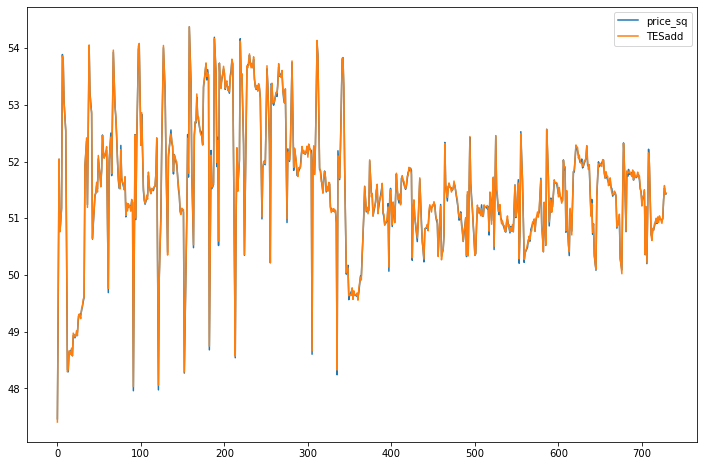

In [54]:
dataframe_sq[['price_sq','TESadd']].iloc[:730].plot(figsize=(12,8))

## Evaluation Metrics

In [55]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_Exp","rmse_Quad","Holt method","Holts winter exponential smoothing with additive seasonality and additive trend"]),"RMSE_Values":pd.Series([rmse_Exp,rmse_Quad,RMSE2,RMSE3])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
2,Holt method,9.632329e-01
3,Holts winter exponential smoothing with additi...,1.017120e+00
1,rmse_Quad,4.497702e+00
0,rmse_Exp,6.310815e+28


## Final Model by combining train and test

In [56]:
dataframe_sq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2182 non-null   object 
 1   price        2182 non-null   float64
 2   price_sq     2182 non-null   float64
 3   t            2182 non-null   int64  
 4   t_square     2182 non-null   int64  
 5   natural_log  2182 non-null   float64
 6   DESadd       2181 non-null   float64
 7   TESadd       2181 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 136.5+ KB


In [57]:
dataframe_sq.head()

,date,price,price_sq,t,t_square,natural_log,DESadd,TESadd
0,2016-01-01,2252.60,47.461563,1,1,3.859920,47.470203,47.404701
1,2016-01-02,2454.50,49.542911,2,4,3.902839,49.532221,49.589497
2,2016-01-03,2708.10,52.039408,3,9,3.952001,52.024704,52.043756
3,2016-01-04,2577.80,50.772040,4,16,3.927346,50.792075,50.759300
4,2016-01-05,2597.75,50.968127,5,25,3.931200,50.974962,50.898104


In [58]:
#dataframe_sq['price_sq'] = math.pow((dataframe_sq['price_sq']),2)

In [59]:
dataframe_sq

,date,price,price_sq,t,t_square,natural_log,DESadd,TESadd
0,2016-01-01,2252.60,47.461563,1,1,3.859920,47.470203,47.404701
1,2016-01-02,2454.50,49.542911,2,4,3.902839,49.532221,49.589497
2,2016-01-03,2708.10,52.039408,3,9,3.952001,52.024704,52.043756
3,2016-01-04,2577.80,50.772040,4,16,3.927346,50.792075,50.759300
4,2016-01-05,2597.75,50.968127,5,25,3.931200,50.974962,50.898104
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,66.290271,2178,4743684,4.194043,66.299154,66.321401
2178,2021-12-18,4389.50,66.253302,2179,4748041,4.193485,66.262186,66.251112
2179,2021-12-19,4389.50,66.253302,2180,4752400,4.193485,66.261845,66.299360
2180,2021-12-20,4354.10,65.985604,2181,4756761,4.189437,65.996618,65.983291


In [60]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(float)
#dataframe_sq['price_sq']=dataframe_sq['price_sq'].astype(float)
#dataframe_sq.info()

In [61]:
#Holt's model forecasting for 30 days with additive trend
Forecast_30=hw_model.forecast(30)
Forecast_30
#dataframe_sq[''] = df['b']**2

2152    66.367357
2153    66.365983
2154    66.364609
2155    66.363235
2156    66.361861
2157    66.360487
2158    66.359113
2159    66.357739
2160    66.356365
2161    66.354991
2162    66.353617
2163    66.352243
2164    66.350869
2165    66.349495
2166    66.348121
2167    66.346746
2168    66.345372
2169    66.343998
2170    66.342624
2171    66.341250
2172    66.339876
2173    66.338502
2174    66.337128
2175    66.335754
2176    66.334380
2177    66.333006
2178    66.331632
2179    66.330258
2180    66.328884
2181    66.327510
dtype: float64

In [62]:
new_dataframe=dataframe_sq[['date','price']]

In [63]:
new_dataframe

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


## Forecasting into the Future

In [64]:
#model_future=ExponentialSmoothing(new_dataframe['price'],trend='add',seasonal_periods=30).fit()

In [65]:
model_future=ExponentialSmoothing(dataframe_sq['price_sq'],trend='add',seasonal_periods=30).fit()

In [66]:
forecast_model=model_future.forecast(30)

<AxesSubplot:>

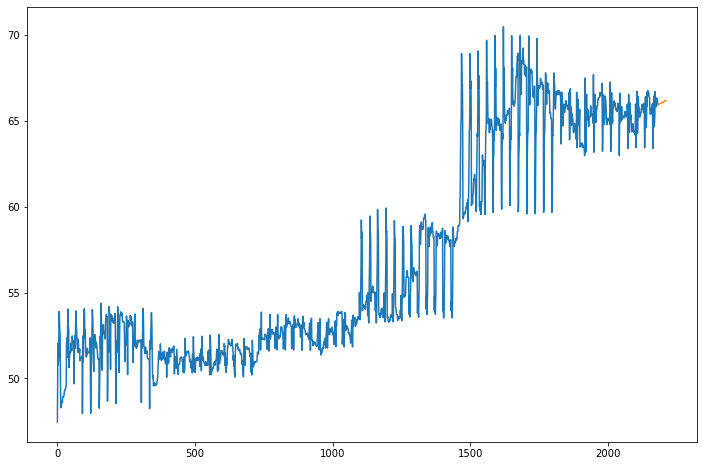

In [67]:
dataframe_sq['price_sq'].plot(figsize=(12,8))
forecast_model.plot()

In [68]:
forecast_model

2182    65.937086
2183    65.945547
2184    65.954008
2185    65.962469
2186    65.970930
2187    65.979391
2188    65.987852
2189    65.996313
2190    66.004774
2191    66.013235
2192    66.021696
2193    66.030157
2194    66.038618
2195    66.047079
2196    66.055540
2197    66.064001
2198    66.072462
2199    66.080923
2200    66.089384
2201    66.097845
2202    66.106306
2203    66.114767
2204    66.123228
2205    66.131689
2206    66.140150
2207    66.148611
2208    66.157072
2209    66.165533
2210    66.173994
2211    66.182455
dtype: float64

In [69]:
Forecast30=forecast_model**2
Forecast30

2182    4347.699323
2183    4348.815182
2184    4349.931183
2185    4351.047327
2186    4352.163615
2187    4353.280045
2188    4354.396619
2189    4355.513336
2190    4356.630196
2191    4357.747200
2192    4358.864346
2193    4359.981636
2194    4361.099069
2195    4362.216645
2196    4363.334365
2197    4364.452227
2198    4365.570233
2199    4366.688382
2200    4367.806674
2201    4368.925109
2202    4370.043687
2203    4371.162409
2204    4372.281273
2205    4373.400281
2206    4374.519432
2207    4375.638727
2208    4376.758164
2209    4377.877745
2210    4378.997468
2211    4380.117335
dtype: float64

In [70]:
#Forecast30_lin=FORECAST.LINEAR(2182:2212,dataframe_sq.price_sq,dataframe_sq.t)

In [71]:
model_future_h = Holt(dataframe_sq["price_sq"]).fit(smoothing_level=0.8, smoothing_trend=0.2)

In [72]:
forecast_model_h=model_future_h.forecast(30)

<AxesSubplot:>

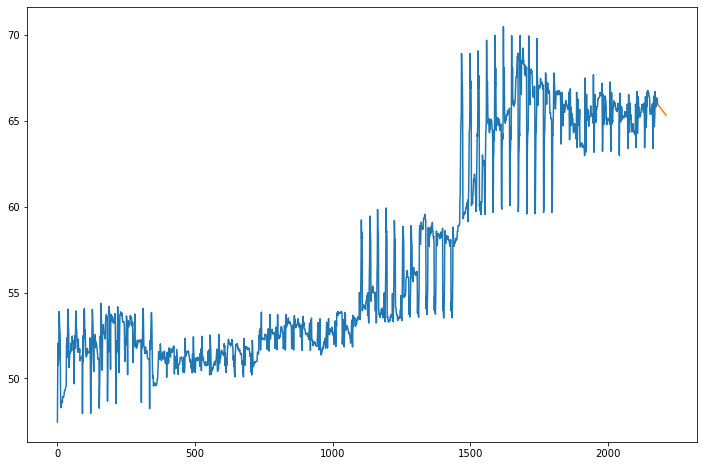

In [73]:
dataframe_sq['price_sq'].plot(figsize=(12,8))
forecast_model_h.plot()

In [74]:
forecast_model_h

2182    65.931409
2183    65.910016
2184    65.888624
2185    65.867231
2186    65.845838
2187    65.824446
2188    65.803053
2189    65.781661
2190    65.760268
2191    65.738875
2192    65.717483
2193    65.696090
2194    65.674697
2195    65.653305
2196    65.631912
2197    65.610519
2198    65.589127
2199    65.567734
2200    65.546341
2201    65.524949
2202    65.503556
2203    65.482163
2204    65.460771
2205    65.439378
2206    65.417985
2207    65.396593
2208    65.375200
2209    65.353807
2210    65.332415
2211    65.311022
dtype: float64

In [75]:
dataframe_sq

,date,price,price_sq,t,t_square,natural_log,DESadd,TESadd
0,2016-01-01,2252.60,47.461563,1,1,3.859920,47.470203,47.404701
1,2016-01-02,2454.50,49.542911,2,4,3.902839,49.532221,49.589497
2,2016-01-03,2708.10,52.039408,3,9,3.952001,52.024704,52.043756
3,2016-01-04,2577.80,50.772040,4,16,3.927346,50.792075,50.759300
4,2016-01-05,2597.75,50.968127,5,25,3.931200,50.974962,50.898104
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,66.290271,2178,4743684,4.194043,66.299154,66.321401
2178,2021-12-18,4389.50,66.253302,2179,4748041,4.193485,66.262186,66.251112
2179,2021-12-19,4389.50,66.253302,2180,4752400,4.193485,66.261845,66.299360
2180,2021-12-20,4354.10,65.985604,2181,4756761,4.189437,65.996618,65.983291


In [76]:
dataframe_sq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2182 non-null   object 
 1   price        2182 non-null   float64
 2   price_sq     2182 non-null   float64
 3   t            2182 non-null   int64  
 4   t_square     2182 non-null   int64  
 5   natural_log  2182 non-null   float64
 6   DESadd       2181 non-null   float64
 7   TESadd       2181 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 136.5+ KB


In [77]:
from pickle import dump

In [78]:
# Saving the model
import pickle
pickle_out=open("regression_gold.pkl", mode="wb")
pickle.dump(model_future,pickle_out)
pickle_out.close()